1. Create an edge map with Canny
2. Find all closed contours, findContours() -> list with all found contours
3. Go through each contour using approxPolyDP to approximate a geometric figure, to find the coordinates for each corner
4. For each element in the coordinate list, count the amount of corners
    * 3 corners => triangle
    * 4 corners => square, rectangle

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage

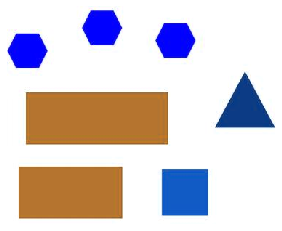

In [2]:
shapes = cv.imread("shapes.jpg")
shapes2 = cv.imread("shapes2.jpg")
shapes3 = cv.imread("shapes3.jpg")
plt.imshow(shapes)
plt.axis('off')
plt.show()

In [3]:
def check_square(approxCurve):
    (x,y,w,h) = cv.boundingRect(approxCurve)
    if (float(w)/h == 1):
        return True
    else:
        return False

In [4]:
def shape(approxCurve):
    corners = len(approxCurve)
    if (corners == 6):
        return "Hexagon"
    elif(corners == 5):
        return "Pentagon"
    elif(corners == 4):
        if (check_square(approxCurve)):
            return "Square"
        else:
            return "Rectangle"
    elif(corners == 3):
        return "Triangle"

In [5]:
def draw_text(contours, image, fontSize):
    for contour in contours:
        epsilon = 0.02 * cv.arcLength(contour, True)
        approxCurve = cv.approxPolyDP(contour, epsilon, True)
        x = approxCurve[0][0][0]
        y = approxCurve[0][0][1]
        text = shape(approxCurve)
        cv.putText(image, text, (x,y), cv.FONT_HERSHEY_SIMPLEX, fontSize, (255,0,0), int(fontSize*3))

In [10]:
def find_shape(image, fontSize):
    """find_shape(image, fontSize) --> None
    @brief Draws the contours of shapes on an image"""
    image_final = image
    image_gray = cv.cvtColor(image_final, cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(image_gray, 127, 255, 0)
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    contours = contours[1:]
    image_contour = cv.drawContours(image_final, contours, -1, (0,255,0), 3)
    draw_text(contours, image_contour, fontSize)
    plt.figure(figsize=(10,10))
    plt.imshow(image_final)
    plt.axis('off')
    plt.show()

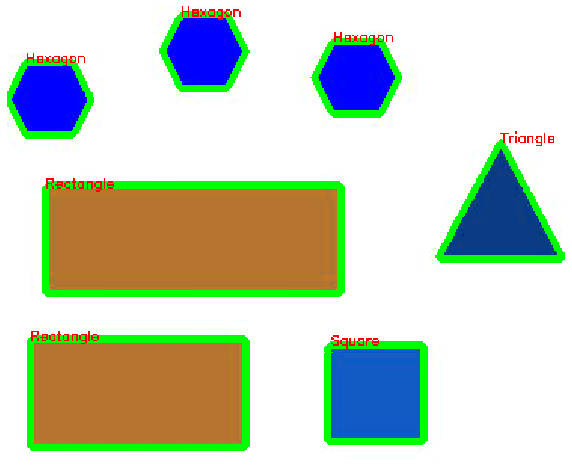

In [7]:
find_shape(shapes, 0.3)

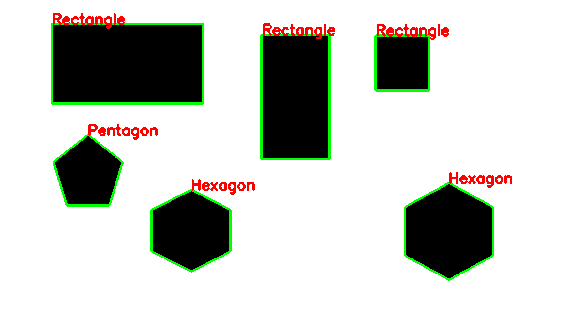

In [8]:
find_shape(shapes2, 1)

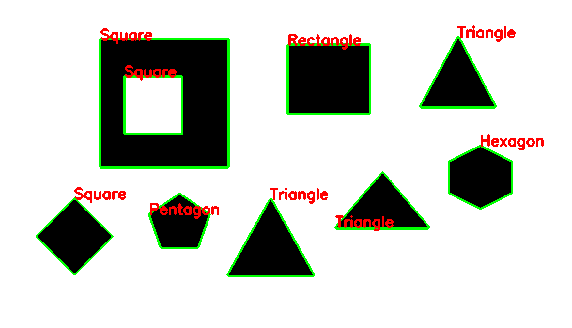

In [9]:
find_shape(shapes3, 1)